### Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

### Load dataset

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

### Analyze data

In [4]:
data.shape

(768, 9)

In [5]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [6]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- we have imbalance dataset

In [7]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

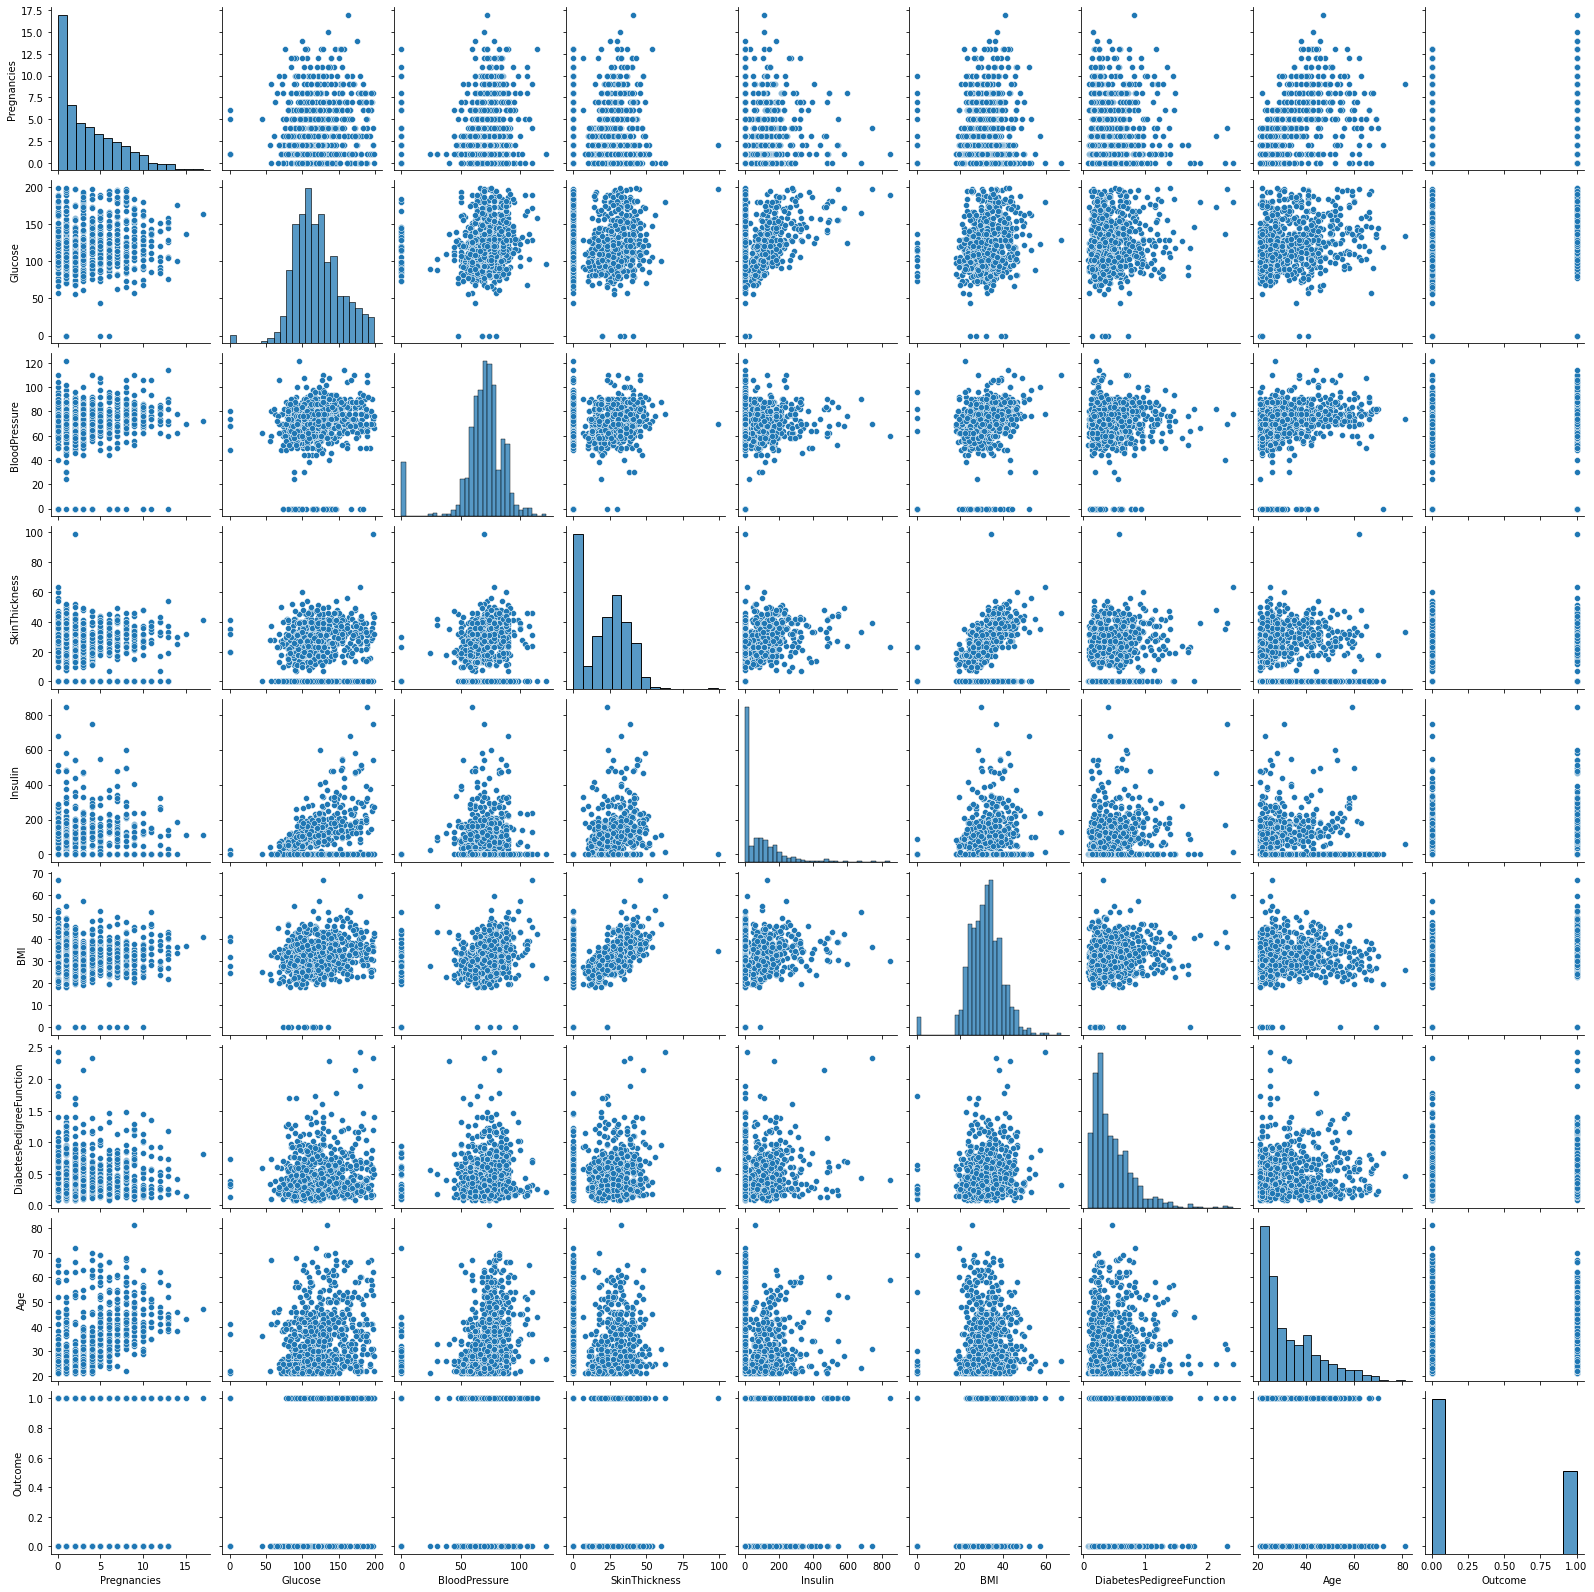

In [8]:
import seaborn as sb

sb.pairplot(data)

### Calculate feature importance using Random forest

In [9]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

rf = RandomForestClassifier()
rf.fit(X,Y)

RandomForestClassifier()

In [10]:
rf.feature_importances_

array([0.08360577, 0.26240803, 0.09038394, 0.06842984, 0.0760061 ,
       0.16233844, 0.12828489, 0.12854299])

- Now find names by index

In [11]:
d = []
for column_name, imp in zip(data.columns[:-1], rf.feature_importances_):
    print(column_name,':',imp)
    d.append([imp, column_name])

Pregnancies : 0.08360577129207891
Glucose : 0.2624080325000409
BloodPressure : 0.090383939905747
SkinThickness : 0.06842984280922276
Insulin : 0.07600609857535144
BMI : 0.16233843984369734
DiabetesPedigreeFunction : 0.12828488723554418
Age : 0.1285429878383175


In [12]:
d

[[0.08360577129207891, 'Pregnancies'],
 [0.2624080325000409, 'Glucose'],
 [0.090383939905747, 'BloodPressure'],
 [0.06842984280922276, 'SkinThickness'],
 [0.07600609857535144, 'Insulin'],
 [0.16233843984369734, 'BMI'],
 [0.12828488723554418, 'DiabetesPedigreeFunction'],
 [0.1285429878383175, 'Age']]

In [13]:
d.sort(reverse=True)
d

[[0.2624080325000409, 'Glucose'],
 [0.16233843984369734, 'BMI'],
 [0.1285429878383175, 'Age'],
 [0.12828488723554418, 'DiabetesPedigreeFunction'],
 [0.090383939905747, 'BloodPressure'],
 [0.08360577129207891, 'Pregnancies'],
 [0.07600609857535144, 'Insulin'],
 [0.06842984280922276, 'SkinThickness']]

In [14]:
pd.DataFrame(d).set_index(1).plot(kind='barh')

<AxesSubplot:ylabel='1'>

### Split Data

In [15]:
cols = ['Glucose','DiabetesPedigreeFunction','BMI','Age','BloodPressure']
X_new = X.loc[:, cols]

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new,Y, random_state=1,
                                               test_size=.20)

In [17]:
xtrain.shape, xtest.shape

((614, 5), (154, 5))

### Feature Scaling

In [18]:
sc = StandardScaler()
sc_train = sc.fit_transform(xtrain)
sc_test = sc.transform(xtest)

### Training

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
rf = RandomForestClassifier(random_state=10)
rf.fit(sc_train, ytrain)

lg = LogisticRegression(class_weight={1:2})
lg.fit(sc_train, ytrain)

LogisticRegression(class_weight={1: 2})

### Prediction

In [21]:
lg_pred = lg.predict(sc_test)
rf_pred = rf.predict(sc_test)

### Evaluation

In [22]:
print("RF Training Score: ", rf.score(sc_train, ytrain))
print("RF Testing Score: ", rf.score(sc_test, ytest))
print()
print("LG Training Score: ", lg.score(sc_train, ytrain))
print("LG Testing Score: ", lg.score(sc_test, ytest))


RF Training Score:  1.0
RF Testing Score:  0.8116883116883117

LG Training Score:  0.754071661237785
LG Testing Score:  0.7922077922077922


In [23]:
confusion_matrix(ytest, lg_pred)

array([[80, 19],
       [13, 42]], dtype=int64)

In [24]:
confusion_matrix(ytest, rf_pred)

array([[89, 10],
       [19, 36]], dtype=int64)

In [25]:
pd.DataFrame({'actual':ytest, 'log pred':lg_pred, 'rf_pred':rf_pred})

actual  log pred  rf_pred
285       0         1        0
101       0         0        0
581       0         0        0
352       0         0        0
726       0         0        0
..      ...       ...      ...
563       0         0        0
318       0         0        0
154       1         1        1
684       0         0        0
643       0         0        0

[154 rows x 3 columns]